*Pillow*

- La imagen original se partió en 3 partes iguales;
- De la parte central, se utilizó el 60% de la altura de la imagen
- El recuadro está separado del borde un 2% en los laterales y 5% arriba y abajo y tiene un grosor fijo de 5px.
- La imagen resultante debe conservar las mismas dimensiones que la original y guardarse en formato PNG.
De ser necesario, utilice la documentación para aplicar otras funciones no vistas en clases.




Se realiza la instalación de la libreria Pillow y se importa de dicha libreria Image

In [ ]:
!pip install pillow
from PIL import Image, ImageDraw


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importo el drive para ver su contenido y usar la imagen

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Cuerpo principal

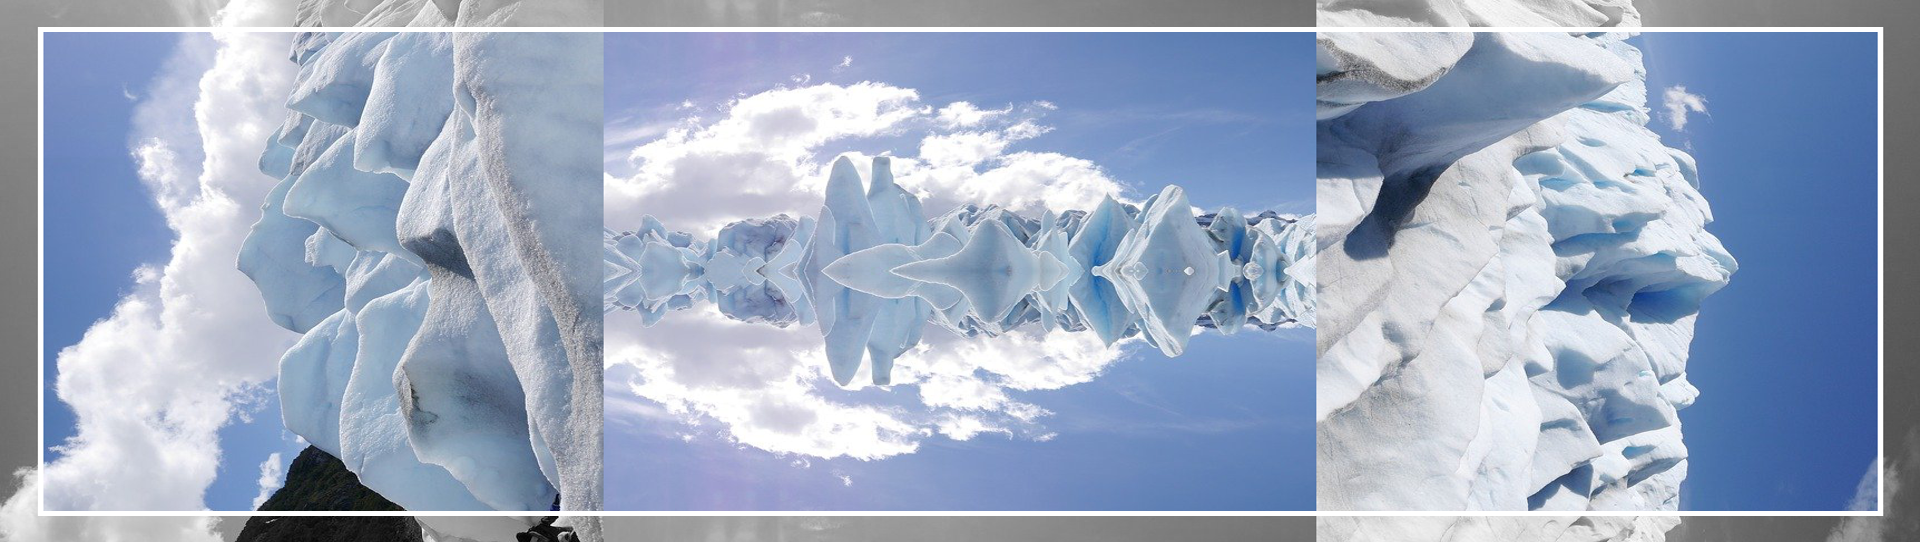

In [ ]:
#Abro la imagen y la guardo en una variable para editarla
imag = Image.open('/content/drive/MyDrive/glaciar.jpg')

#Divido la imagen en 3 martes izq|centro|derecha para trabajarlas por separadas y luego unirlas 
#Guardando cada una de estas imagenes en una variable diferente
# Primera imagen (Se desea recortar el primer tercio de la imagen)
im_izq = imag.crop((0, 0, round(imag.width/3), imag.height))  

# Segunda Imagen (Se recorta desde un tercio la imagen original hasta dos tercios el ancho de la imagen)
im_centro = imag.crop((round(imag.width/3),0,round(((imag.width/3)*2)),imag.height)) 

# Tercera Imagen (Se recorta desde dos tercios de la imagen original hasta el final)
im_der = imag.crop((round(((imag.width/3)*2)),0,imag.width,imag.height)) 

#Roto la imagen de la izquierda 90° y la expando para que llene todo el espacio del fondo
im_izq = im_izq.rotate(90,expand=True) 
im_izq = im_izq.resize((im_izq.width,imag.height))

#Roto la imagen de la derecha 270° y la expando para que llene todo el espacio del fondo
im_der = im_der.rotate(270,expand=True)
im_der = im_der.resize((im_der.width,imag.height))

#Recorto la imagen 60 por ciento de su altura restando a la altura total el 40%
im_centrosup= im_centro.crop((0,0,im_centro.width,round(im_centro.height-im_centro.height*0.40))) 

#Realizo el espejo la imagen anterior 
im_centroesp=im_centrosup.transpose(Image.FLIP_TOP_BOTTOM) 

#Creo una imagen con el ancho de la imag recortada
imagencentrofinal = Image.new('RGB', (round(im_centrosup.width), im_centrosup.height*2), (255, 255, 255)) 
#Pego img centro superior.
imagencentrofinal.paste(im_centrosup, (0,0)) 
#pego la segunda imagen debajo de la anterior pegada.
imagencentrofinal.paste(im_centroesp, (0,im_centrosup.height))

imagencentrofinal = imagencentrofinal.resize((imagencentrofinal.width,imag.height))


#--------------------------------Imagen Junta-----------------------------------

#Imagen para aplicar filtros juntando las 3 imagenes izq, centro y derecha y pegarlas en una imagen nueva
#Creo una imagen en blanco con la suma de los anchos de cada imagen final para agregar
imagensinfiltros = Image.new('RGB', (round(im_izq.width+im_centro.width+im_der.width), imag.height), (255, 255, 255)) 

#Pego las 3 imagenes ya tratadas anteriormente
imagensinfiltros.paste(im_izq,(0,0)) 
imagensinfiltros.paste(imagencentrofinal,(im_izq.width,0)) 
imagensinfiltros.paste(im_der,(round(im_centro.width+im_izq.width),0)) 

#--------------------------------Imagen final-----------------------------------

#----------------Imagen Blanco y negro predominando los verdes------------------

#Se realiza el split de la imagen por colores utilizando el g que contrastandolo con la imagen deseada es el semejante
r, g, b = imagensinfiltros.split() 

# Debo recortar la imagen en el EXTREMO SUPERIOR IZQUIERDO por el 2% del ancho y 5% de la altura
# y el  EXTREMO SUPERIOR DERECHO al ancho total restarle el 2% y al alto total el 5%

im_interior= imagensinfiltros.crop((round(imagensinfiltros.width*0.02),round(imagensinfiltros.height*0.05),
                                    round(imagensinfiltros.width-(imagensinfiltros.width*0.02)),round(imagensinfiltros.height-(imagensinfiltros.height*0.05)))) 

#--------------------------Superpocisión de Imagenes----------------------------

#Creo una imagen nueva para editar con el tamaño de la g
finalimag = Image.new('RGB', (round(g.width), g.height), (255, 255, 255))
#Pego la imagen g para el fondo
finalimag.paste(g,(0,0)) 
#Pego la imagen del centro en las coordenadas establecidas al 2% del alto y a %5 del ancho
finalimag.paste(im_interior,(round(g.width*0.02),round(g.height*0.05))) 

#------------------Dibujado de Rectangulo blanco 5 px ancho---------------------
#Habilito la foto para poder dibujar
finalimagdibujar = ImageDraw.Draw(finalimag)

#Dibujo un rectangulo en las mismas coordenas donde se pego la foto central, con ancho de 5 pix
finalimagdibujar.rectangle(((imagensinfiltros.width*0.02), round(imagensinfiltros.height*0.05), round(imagensinfiltros.width-(imagensinfiltros.width*0.02)),
                            round(imagensinfiltros.height-(imagensinfiltros.height*0.05))),width=5)

#Redimenciono la imagen a 1920,542
finalimag= finalimag.resize((1920,542)) 

#Guardo imagen como glaciarmodificada con formato png.
finalimag
finalimag.save("/content/drive/MyDrive/glaciarmodificada.png")